In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name=='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
    
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [2]:
z_95=stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


In [3]:
n=100
m_u=70
m_sigma=8.9
hysis_u=71.798

z=(hysis_u-m_u)/(m_sigma/np.sqrt(n))
print(z)

2.0202247191011256


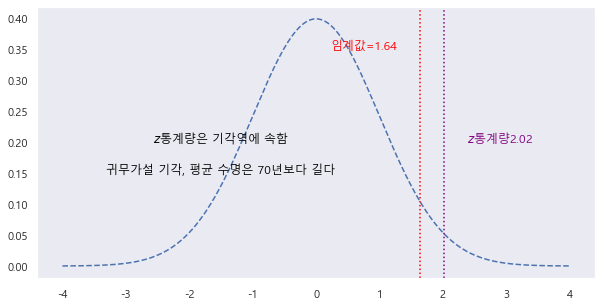

In [4]:
xx=np.linspace(-4,4,1000)
black={"facecolor": "black"}
plt.figure(figsize=(10,5))

pdf_norm=stats.norm.pdf(xx)

plt.plot(xx,pdf_norm,'b--')

plt.axvline(x=z_95,color='red',linestyle=':')
plt.text(0.75,.35,'임계값='+str(round(z_95,2)),
        horizontalalignment='center',color='red')

plt.axvline(x=z,color='purple',linestyle=':')
plt.text(2.9,.2,'$z$통계량'+str(round(z,2)),
        horizontalalignment='center',color='purple')
plt.text(-1.5,.2,'$z$통계량은 기각역에 속함',
        horizontalalignment='center',color='black')
plt.text(-1.5,.15,'귀무가설 기각, 평균 수명은 70년보다 길다',
        horizontalalignment='center',color='black')
plt.grid()
plt.show()

In [5]:
n=12
s_mu=42
s_sigma=11.9
hysis_mu=46

t_95=-1*stats.t.ppf(0.95,df=n-1)

print(t_95)

-1.7958848187036691


In [6]:
t_value=(s_mu - hysis_mu)/(s_sigma/np.sqrt(n))
print(t_value)

-1.1644039042479846


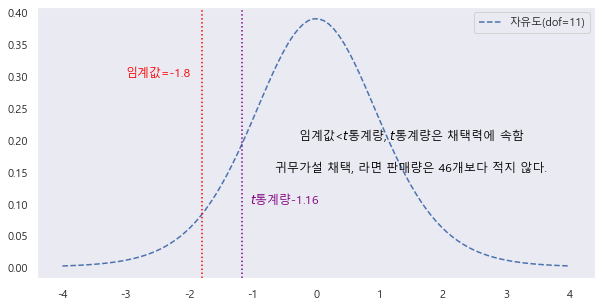

In [7]:
t_data=np.linspace(-4,4,100)
t_dist=stats.t(df=n-1)

black={"facecolor": "black"}
plt.figure(figsize=(10,5))

t_dist=stats.t(df=n-1)
plt.plot(t_data,t_dist.pdf(t_data),'b--',label=("자유도(dof=%d)"%11))

plt.axvline(x=t_95, color='red',linestyle=':')
plt.text(-2.5,.3,'임계값='+str(round(t_95,2)),
        horizontalalignment='center',color='red')

plt.axvline(x=t_value,color='purple',linestyle=':')
plt.text(-0.5,.1,'$t$통계량'+str(round(t_value,2)),
        horizontalalignment='center',color='purple')
plt.text(1.5,.2,'임계값<$t$통계량, $t$통계량은 채택력에 속함',
        horizontalalignment='center',color='black')
plt.text(1.5,.15,'귀무가설 채택, 라면 판매량은 46개보다 적지 않다.',
       horizontalalignment='center',color='black')
plt.grid()
plt.legend()
plt.show()

In [8]:
n=12
s_mu=42
s_sigma=11.9
hysis_mu=46

t_95=round(-1*stats.t.ppf(0.95,df=n-1),3)

print("기각값:",t_95)

t_value=(s_mu-hysis_mu)/(s_sigma/np.sqrt(n))
print('t통계량:',round(t_value,3))

기각값: -1.796
t통계량: -1.164


In [9]:
round(stats.t(df=11).cdf(t_value),3)

0.134

Text(1, 0.05, '결론:라면 판매량은 46개보다 적지 않다.')

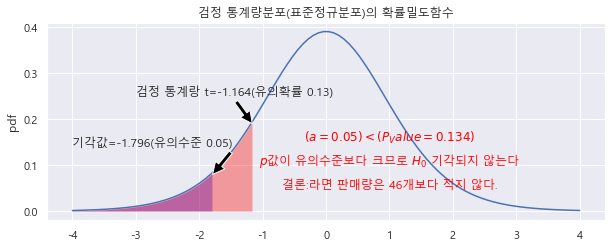

In [10]:
norm_rv=stats.t(df=11)

xx=np.linspace(-4,4,100)
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(xx,norm_rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정 통계량분포(표준정규분포)의 확률밀도함수")
black={"facecolor":"black"}

plt.annotate('기각값=-1.796(유의수준 0.05)', xy=(-1.79,0.08),xytext=(-4,0.14),arrowprops=black)

xx2=np.linspace(-4,-1.796,100)
plt.fill_between(xx2,norm_rv.pdf(xx2),facecolor='blue',alpha=0.35)

plt.annotate('검정 통계랑 t=-1.164(유의확률 0.13)',xy=(-1.164,0.19),xytext=(-3,0.25),arrowprops=black)

xx3=np.linspace(-4,-1.164,100)
plt.fill_between(xx3,norm_rv.pdf(xx3),facecolor='red',alpha=0.35)

plt.text(1,.15,'$(a=0.05)<(P_Value=0.134)$',
        horizontalalignment='center',color='red')

plt.text(1,.10,'$p$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다',
        horizontalalignment='center',color='red')

plt.text(1,.05,'결론:라면 판매량은 46개보다 적지 않다.',
        horizontalalignment='center',color='red')

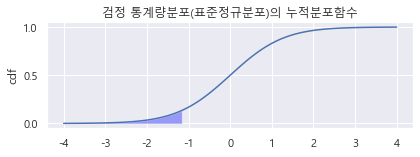

In [11]:
plt.subplot(212)
plt.plot(xx,norm_rv.cdf(xx))

plt.fill_between(xx3,norm_rv.cdf(xx3),facecolor='blue',alpha=0.35)
plt.ylabel("cdf")
plt.title("검정 통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()